In [7]:
# for creating a responsive plot
# %matplotlib notebook

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

In [8]:
import numpy as np
import csv
from datetime import datetime
from os import mkdir, listdir

import pandas as pd

In [9]:
# -------- range of the variables ----------
range_D     = [0.5, 0.8]
range_AEdAO = [0.3, 1.05]
range_PdD   = [0.5, 1.4]
range_Z     = [2, 7]

In [10]:
dir_name = 'scans_with_constraints'
V_Ss = ['7_0', '7_5', '8_0', '8_5']

In [28]:
col_names = ['D', 'AEdAO', 'PdD', 'Z', 'P_B', 'n', 'fit', 't075dD','tmin075dD', 'tal07R','cavLim', 'Vtip','Vtipmax']

dfs_vs = {}   # dict of (dicts for df by z) for each V_S

for V_S in V_Ss:
    vs_dir_name = dir_name+'/'+V_S
    dfs = {} # dicts for df by z
    for filename in listdir(vs_dir_name):
        z = int(filename[0])
        filename = vs_dir_name+'/'+filename
        df = pd.read_csv(filename, header=None, skiprows=1, names=col_names)
        df = df.drop(columns=['n', 'fit'])
        # Strength Constraint
        df['Strenght'] = df['tmin075dD'] - df['t075dD']
        # Cavitation Constrant
        df['Cavitation'] = df['tal07R'] - df['cavLim']
        # Peripherical Velocity Constraint
        df['Velocity'] = df['Vtip'] - df['Vtipmax']
        # drop unused columns
        df = df.drop(columns=['Z','t075dD','tmin075dD','tal07R','cavLim','Vtip', 'Vtipmax'])
        # validity
        df['Valid'] = ((df['Strenght'] <= 0) & (df['Cavitation'] <= 0) & (df['Velocity'] <= 0))
        
        dfs[z] = df
    dfs_vs[V_S] = dfs

In [29]:
dfs_vs['8_0'][2]

,D,AEdAO,PdD,P_B,Strenght,Cavitation,Velocity,Valid
0,0.665517,0.30,0.500000,150.659172,-0.002520,0.172588,15.642504,False
1,0.665517,0.30,0.531034,149.950820,-0.002470,0.185843,13.763387,False
2,0.665517,0.30,0.562069,149.830663,-0.002416,0.199363,12.053809,False
3,0.665517,0.30,0.593103,150.118026,-0.002362,0.213232,10.485585,False
4,0.665517,0.30,0.624138,150.792585,-0.002306,0.227706,9.047864,False
...,...,...,...,...,...,...,...,...
26995,0.696552,1.05,1.275862,166.615450,-0.001993,0.114672,-13.353780,False
26996,0.696552,1.05,1.306897,165.864874,-0.002081,0.125970,-13.818208,False
26997,0.696552,1.05,1.337931,164.970569,-0.002179,0.137766,-14.266114,False
26998,0.696552,1.05,1.368966,163.910430,-0.002286,0.150108,-14.699626,False


In [67]:
print('Amount of valid solutions found for each Z')

valid_vs = {}

for vs in sorted(dfs_vs):
    print(vs)
    dfs = dfs_vs[vs]
    # valids
    valid_vs[vs] = {}
    for z in sorted(dfs):
        valids = len(dfs[z].loc[dfs[z]['Valid']])
        print(' ', z, valids)
        valid_vs[vs][z] = valids

Amount of valid solutions found for each Z
7_0
  2 2383
  3 2464
  4 2524
  5 2534
  6 2531
  7 2277
7_5
  2 1052
  3 1108
  4 1133
  5 1155
  6 1173
  7 916
8_0
  2 349
  3 373
  4 391
  5 397
  6 411
  7 128
8_5
  2 65
  3 73
  4 77
  5 79
  6 86
  7 0


In [68]:
for vs in sorted(valid_vs):
    amount = 0
    for z in valid_vs[vs]:
        amount += valid_vs[vs][z]
    print(vs, amount)

7_0 14713
7_5 6537
8_0 2049
8_5 380


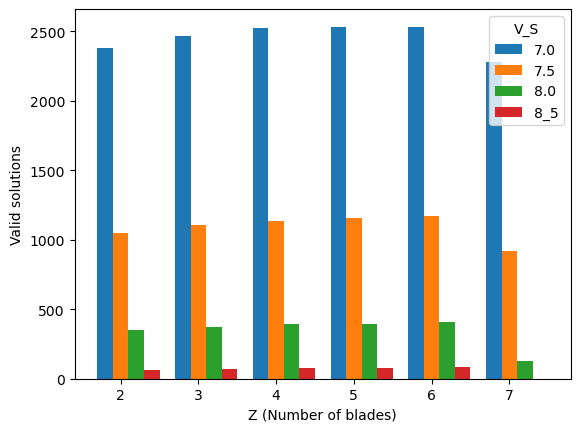

In [63]:
# create data
x = np.arange(6)
vs = '7_0'
y1 = [(valid_vs[vs][z] if z in valid_vs[vs] else 0) for z in range(2,8)]
vs = '7_5'
y2 = [(valid_vs[vs][z] if z in valid_vs[vs] else 0) for z in range(2,8)]
vs = '8_0'
y3 = [(valid_vs[vs][z] if z in valid_vs[vs] else 0) for z in range(2,8)]
vs = '8_5'
y4 = [(valid_vs[vs][z] if z in valid_vs[vs] else 0) for z in range(2,8)]
width = 0.2

# plot data in grouped manner of bar type
plt.bar(x-width,   y1, width)
plt.bar(x,         y2, width)
plt.bar(x+width,   y3, width)
plt.bar(x+width*2, y4, width)
plt.xticks(x, [str(z) for z in range(2,8)])
plt.xlabel("Z (Number of blades)")
plt.ylabel("Valid solutions")
plt.legend(["7.0", "7.5", "8.0", "8_5"], title='V_S')
# plt.ylim(0,3000)
plt.show()
